In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('HotelReservations.csv')

In [3]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})
df['market_segment_type'] = df['market_segment_type'].map({'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
df = df.drop('Booking_ID', axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('booking_status', axis=1))
scaled_features = scaler.transform(df.drop('booking_status', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = df.drop('booking_status', axis=1).columns)

In [5]:
from sklearn.model_selection import train_test_split
x = scaled_data
y = df['booking_status']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [6]:
from sklearn.metrics import confusion_matrix

X = df[['no_of_adults','no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan','required_car_parking_space', 'room_type_reserved',	'lead_time', 'arrival_month', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']] 
Y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(
    n_neighbors=1, #количество соседей, используемых по умолчанию для запросов.
    metric='manhattan',#метрика расстояния, используемая для дерева
    weights='distance')
    #весовая функция, используемая в прогнозировании.
        # «uniform»: все точки имеют одинаковый вес.
        # «distance»: вес точек равен их расстоянию. (более близкие соседи точки запроса будут иметь большее влияние,
    #чем соседи, находящиеся дальше)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9812
           1       0.72      0.75      0.73      4698

    accuracy                           0.82     14510
   macro avg       0.80      0.80      0.80     14510
weighted avg       0.82      0.82      0.82     14510



<Axes: >

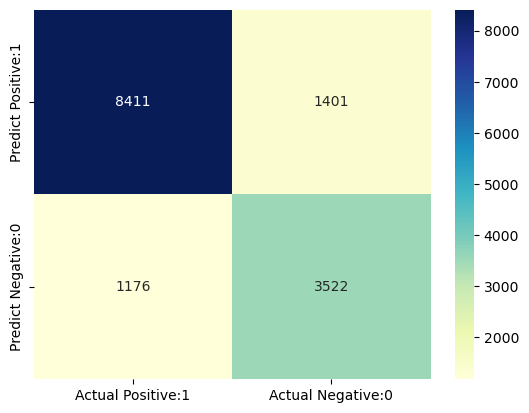

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [8]:
from sklearn.ensemble import RandomForestClassifier

X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X, Y, test_size=0.4, random_state=101)
model_rf = RandomForestClassifier(random_state = 42,
                                  n_estimators = 100,# число деревьев
                                  max_depth = 50)# глубина
model_rf.fit(X_train_F, y_train_F)
y_pred_F = model_rf.predict(X_test_F)
from sklearn import metrics
print(metrics.classification_report(y_test_F, y_pred_F))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      9812
           1       0.87      0.80      0.84      4698

    accuracy                           0.90     14510
   macro avg       0.89      0.87      0.88     14510
weighted avg       0.90      0.90      0.90     14510



<Axes: >

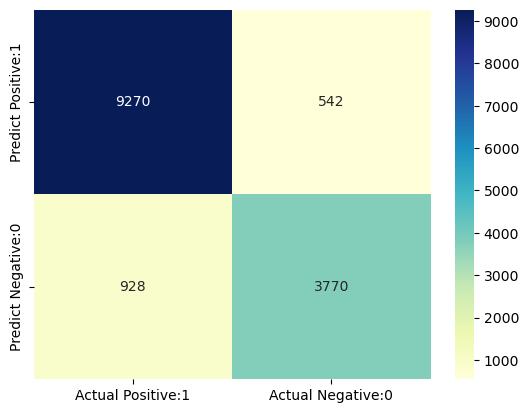

In [9]:
cm_F = confusion_matrix(y_test_F, y_pred_F)
cm_matrix_F = pd.DataFrame(data=cm_F, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_F, annot=True, fmt='d', cmap='YlGnBu')

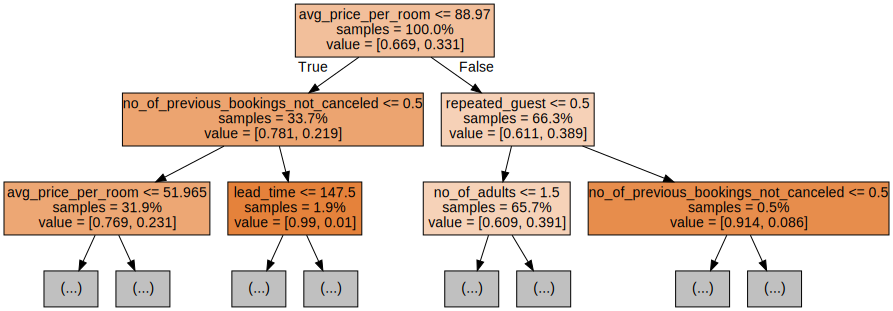

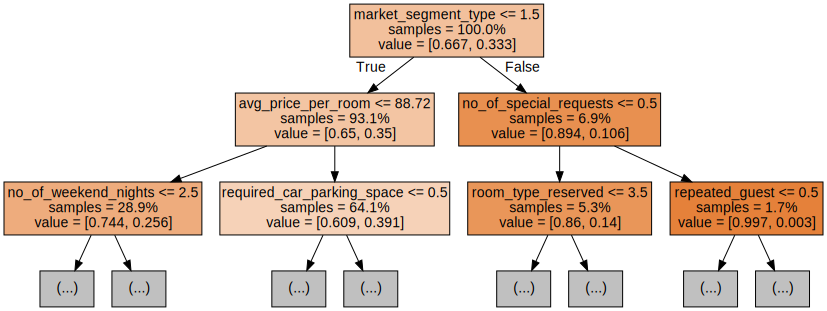

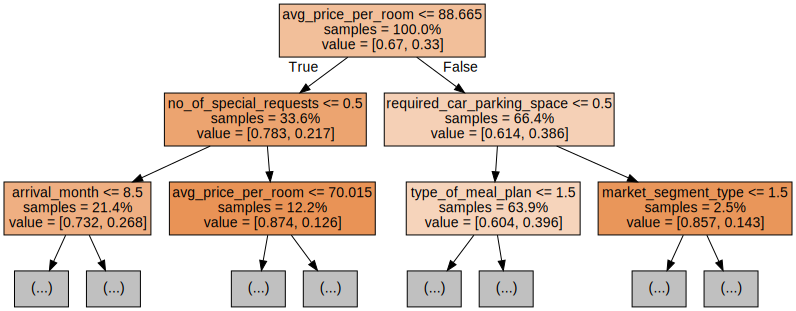

In [10]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = model_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [11]:

#plt.barh(df.columns, model_rf.feature_importances_)
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

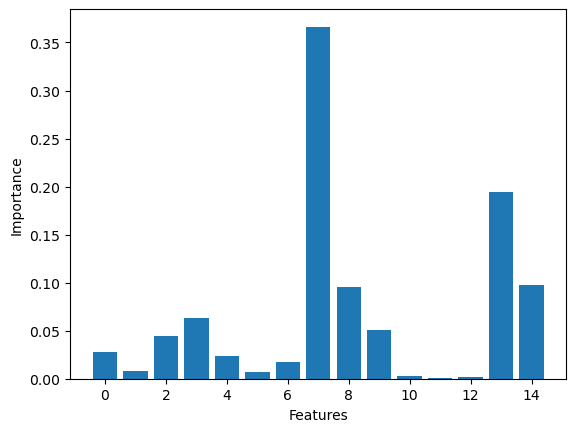

In [12]:
import matplotlib.pyplot as plt
plt.bar(range(X.shape[1]), model_rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

In [13]:
from sklearn import svm
from sklearn.metrics import recall_score

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, Y, test_size=0.4, random_state=101)
C = 1.0  # = self._alpha in our algorithm
model1 = svm.SVC(kernel='linear', C=C)
#model1 = svm.LinearSVC(C=C, max_iter=10000)
#model1 = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#model1 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)

model1.fit(X_train_svm, y_train_svm)
y_predict_svm = model1.predict(X_test_svm)
print(recall_score(y_test_svm, y_predict_svm, average=None))
print(metrics.classification_report(y_test_svm, y_predict_svm))

[0.89737057 0.58301405]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      9812
           1       0.73      0.58      0.65      4698

    accuracy                           0.80     14510
   macro avg       0.77      0.74      0.75     14510
weighted avg       0.79      0.80      0.79     14510



<Axes: >

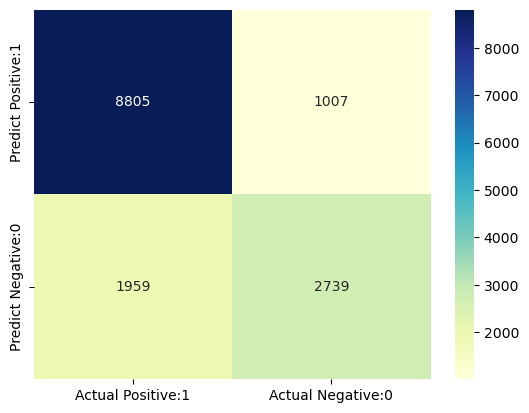

In [14]:
cm_svm = confusion_matrix(y_test_svm, y_predict_svm)
cm_matrix_svm = pd.DataFrame(data=cm_svm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_svm, annot=True, fmt='d', cmap='YlGnBu')

LogisticRegression: ROC AUC=0.740


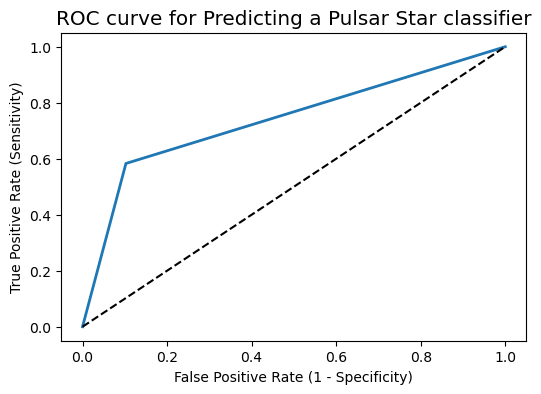

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_svm, y_predict_svm)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for Predicting a Pulsar Star classifier')
lr_auc = roc_auc_score(y_test_svm, y_predict_svm)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))




plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


LogisticRegression: ROC AUC=0.803


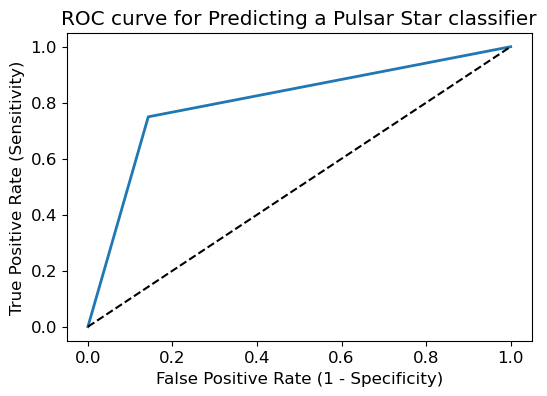

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for Predicting a Pulsar Star classifier')
lr_auc = roc_auc_score(y_test, y_pred)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))




plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

LogisticRegression: ROC AUC=0.874


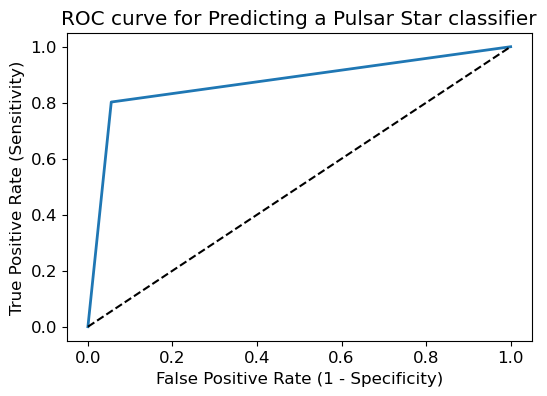

In [17]:
fpr, tpr, thresholds = roc_curve(y_test_F, y_pred_F)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for Predicting a Pulsar Star classifier')
lr_auc = roc_auc_score(y_test_F, y_pred_F)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))




plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()